#CO 544 Machine Learning and Data Mining 
#Lab 05

## E/17/297

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Decision tree classifier
from sklearn.model_selection import train_test_split
from sklearn import metrics # scikit-learn metrics module for computing accuracy

In [4]:
folder = '/content/drive/MyDrive/CO544/Lab 5/'

import warnings
warnings.filterwarnings('ignore') # Ignore warning messages

In [8]:
wine_df = pd.read_csv(folder + 'wine.csv', header=None, sep='\n')
wine_df.head() # Preview the dataset

,0
0,"Alcohol,Malic acid,Ash,Alcalinity of ash,Magne..."
1,"14.23,1.71,2.43,15.6,127,2.8,3.06,0.28,2.29,5...."
2,"13.2,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4...."
3,"13.16,2.36,2.67,18.6,101,2.8,3.24,0.3,2.81,5.6..."
4,"14.37,1.95,2.5,16.8,113,3.85,3.49,0.24,2.18,7...."


In [9]:
wine_df = wine_df[0].str.split(',', expand=True)
wine_df = wine_df.drop(wine_df.columns[14], axis=1)
wine_df = wine_df.drop(index=0)
wine_df.head() 

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
1,14.23,1.71,2.43,15.6,127,2.8,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
2,13.2,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.4,1050,1
3,13.16,2.36,2.67,18.6,101,2.8,3.24,0.3,2.81,5.68,1.03,3.17,1185,1
4,14.37,1.95,2.5,16.8,113,3.85,3.49,0.24,2.18,7.8,0.86,3.45,1480,1
5,13.24,2.59,2.87,21,118,2.8,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [10]:
wine_df.shape

(178, 14)

In [11]:
col_names = ['Alcohol','Malic acid','Ash','Alcalinity','Magnesium','Total phenols',
             'Flavanoids','Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue',
             'OD280/OD315 of diluted wines','Proline','Class']# Define new column names
# Rename column names
wine_df.columns = col_names



In [ ]:
wine_df.info() 

In [ ]:
for col in col_names:
    print(wine_df[col].value_counts())

In [16]:
wine_df['Class'].value_counts()

2    71
1    59
3    48
Name: Class, dtype: int64

In [17]:
wine_df.isnull().sum() #Checking missing values in variables

Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity                      0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
Class                           0
dtype: int64

In [18]:
# Defining feature vector and target variable
X = wine_df.drop(['Class'], axis=1) # Drop the target variable
y = wine_df['Class']

In [19]:
# Splitting data
# 75% training and 25% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
X_train.shape, X_test.shape # Shapes of X_train and X_test

((133, 13), (45, 13))

In [20]:
X_train.dtypes # Check data types in X_train


Alcohol                         object
Malic acid                      object
Ash                             object
Alcalinity                      object
Magnesium                       object
Total phenols                   object
Flavanoids                      object
Nonflavanoid phenols            object
Proanthocyanins                 object
Color intensity                 object
Hue                             object
OD280/OD315 of diluted wines    object
Proline                         object
dtype: object

## 1.classifiers with Gini index

In [21]:
# Create decision tree classifier object
clf_gini = DecisionTreeClassifier(criterion='gini',
                                 max_depth=4,
                                 random_state=0) 


In [22]:
# Train the classifier
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [23]:
# Predicting results for the test set
y_pred = clf_gini.predict(X_test)

In [24]:
# Evaluating model
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.9555555555555556


In [26]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test,y_pred)
print(conf_mat)

[[18  0  0]
 [ 1 15  1]
 [ 0  0 10]]


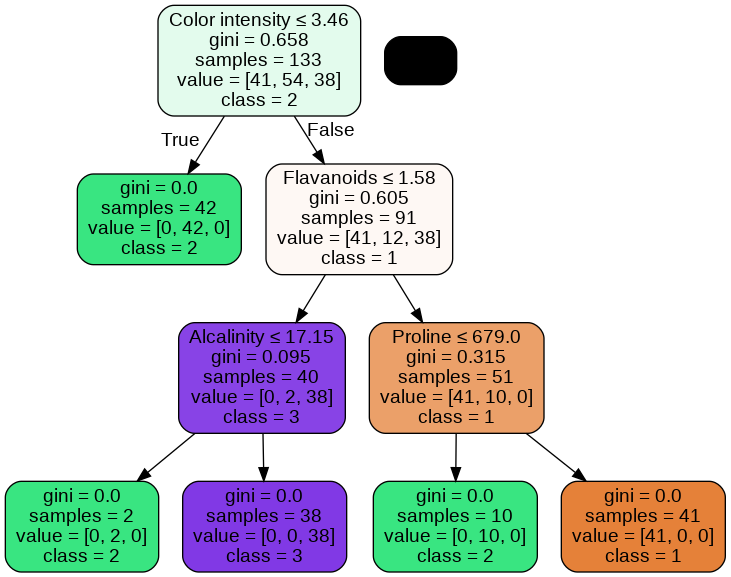

In [28]:
# Visualizing decision trees
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()

export_graphviz(clf_gini,
out_file=dot_data,
filled=True,
rounded=True,
special_characters=True,
feature_names=X.columns,
class_names=['1', '2', '3'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('gini_index.png')
Image(graph.create_png())

## classifiers with entropy

In [31]:
# Create decision tree classifier object
clf_entropy = DecisionTreeClassifier(criterion='entropy',
                                 max_depth=4,
                                 random_state=0) 

In [32]:
# Train the classifier
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)

In [33]:
# Predicting results for the test set
y_pred = clf_entropy.predict(X_test)

In [34]:
# Evaluating model
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.9555555555555556


In [35]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test,y_pred)
print(conf_mat)

[[17  1  0]
 [ 1 16  0]
 [ 0  0 10]]


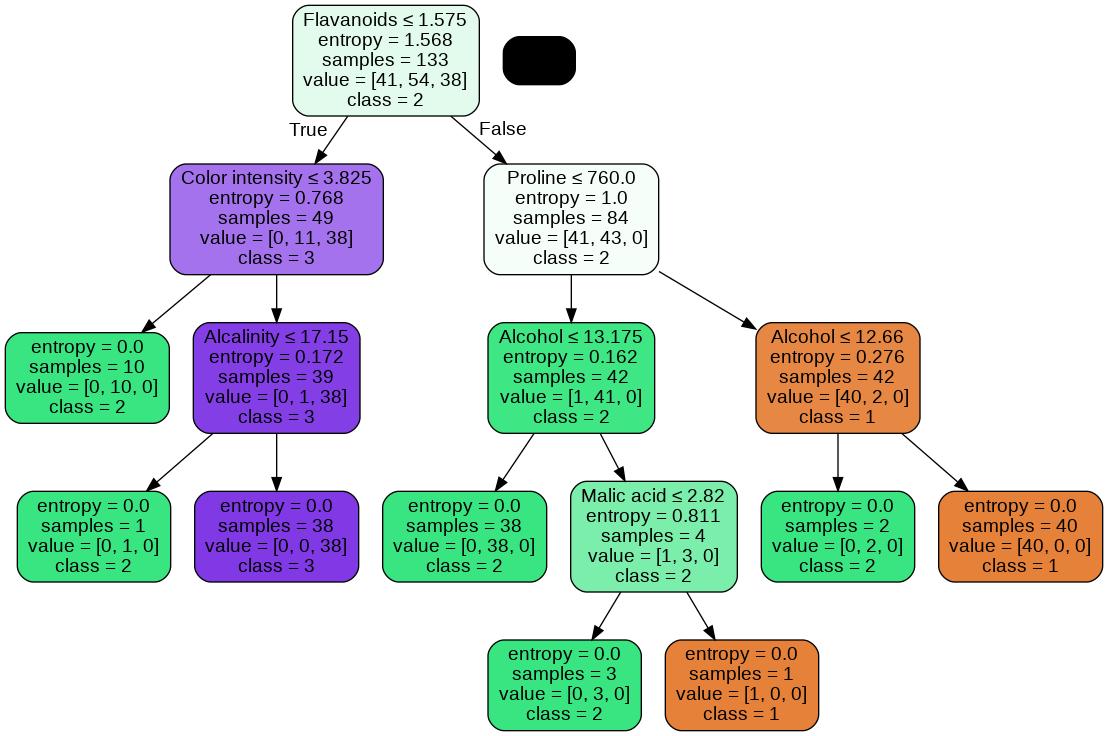

In [37]:
# Visualizing decision trees
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()

export_graphviz(clf_entropy,
out_file=dot_data,
filled=True,
rounded=True,
special_characters=True,
feature_names=X.columns,
class_names=['1', '2', '3'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('entropy.png')
Image(graph.create_png())